In [1]:
# Imports
import IPython
import IPython.display
import pandas as pd
from numpy import mean
from numpy import std
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow as tf
import math
import seaborn as sns
from prettytable import PrettyTable as pt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_filtered_records = "../Renamed_Filtered_Records\\"

def remove_noise_from_earthquake(path = '../Records_Europe_csv'):
    all_files = glob.glob(path + "/*.csv")
    count = 0
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0, dtype=float)
        df.set_axis(["time", "acceleration"],axis=1,inplace=True)
        
        new_file_name = filename.replace("../Records_Europe_csv","")
        new_file_name = new_file_name.replace("..",".")
        new_file_name = new_file_name.replace(".ACC.MP.ASC.csv",".csv")
        new_file_name = new_file_name.replace(".D.",".")

        max_vals = df['acceleration'].abs().max()
        min_criteria_value = max_vals * 0.05
            
        for index, row in df.iterrows():
            if abs(float(row.acceleration)) >= min_criteria_value:
                df_temp = df.iloc[index:]
                df_temp.to_csv(path_filtered_records + new_file_name, index = False)                
        count = count + 1
    print(count)

remove_noise_from_earthquake()


KeyboardInterrupt



In [3]:
# Table
atrributes_table = pt()

In [4]:
# Data
records_europe = pd.read_csv(r'./ESM_flatfile_SA_.csv', low_memory=False)
#Add rows
#atrributes_table.add_row(["Total of rows",len(records_europe)])
#atrributes_table.add_row(["Total of columns",records_europe.shape[1]])
############################################################################

ml_df = pd.DataFrame(records_europe,columns=['ML'])
ml_df = ml_df.dropna()
ml_df = ml_df.apply(np.floor)
ml_uniq, ml_counts = np.unique(ml_df, return_counts=True)
#print(ml_uniq)  # [2. 3. 4. 5. 6. 7.]
#print(ml_counts) # [ 599 3629 2248  916  604  103]
#ml_df_count = ml_df.value_counts()
#print(ml_df_count)

mw_df = pd.DataFrame(records_europe,columns=['Mw'])
mw_df = mw_df.dropna()
mw_df = mw_df.apply(np.floor)
mw_uniq, mw_counts = np.unique(mw_df, return_counts=True)
#print(mw_uniq)   # [3. 4. 5. 6. 7.]
#print(mw_counts) # [ 1786 11931  3997  1741  86]
mw_counts = mw_counts.tolist()
mw_counts.insert(0, 0.0)
# print(mw_counts)

ms_df = pd.DataFrame(records_europe,columns=['Ms'])
ms_df = ms_df.dropna()
ms_df = ms_df.apply(np.floor)
ms_uniq, ms_counts = np.unique(ms_df, return_counts=True)
#print(ms_uniq)   # [2. 3. 4. 5. 6. 7.]
#print(ms_counts) # [ 599 3629 2248  916  604  103]

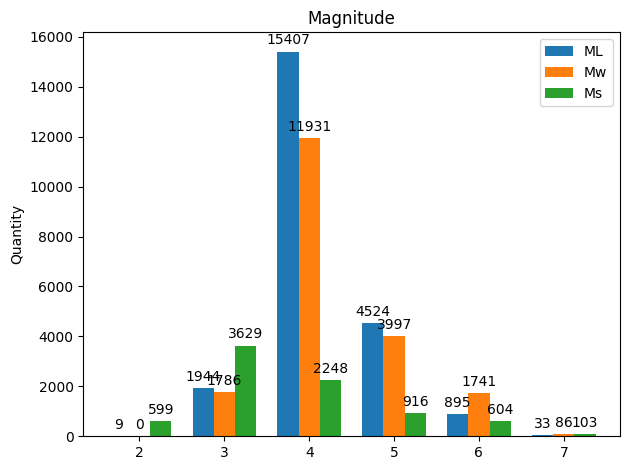

++
||
++
++


In [5]:
######################################################################
############ Descriptive analysis ####################################
######################################################################

labels = list(range(2, 8))

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , ml_counts.tolist(), width, label='ML')
rects2 = ax.bar(x+width  , mw_counts, width, label='Mw')
rects3 = ax.bar(x+width*2, ms_counts.tolist(), width, label='Ms')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_title('Magnitude')
ax.set_xticks(x+width, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()
############################################################################
#atrributes_table.del_row(2)

#Add headers
#atrributes_table.field_names = ["Attributes","Values"]

print(atrributes_table)




In [6]:
######################################################################
############ Clean Up Data ###########################################
######################################################################


print(len(records_europe))
#23014

#Mw

# remoção das colunas desnecessarias
new_records_europe_mw = pd.DataFrame(records_europe,columns=['event_id','Mw','epi_dist'])

# Remover epi_dist < 10 Km
new_records_europe_mw = new_records_europe_mw[new_records_europe_mw.epi_dist > 10]

# Remove null values
new_records_europe_mw = new_records_europe_mw[new_records_europe_mw.Mw.notnull()]

new_records_europe_mw['Mw'] = new_records_europe_mw['Mw'].apply(lambda x: math.floor(x))

# dropping ALL duplicate values
new_records_europe_mw.drop_duplicates(subset="event_id",keep=False, inplace=True)

mw_uniq, mw_counts = np.unique(new_records_europe_mw.Mw, return_counts=True)
print(mw_uniq)
print(mw_counts)

new_records_europe_mw.rename(columns = {'Mw':'Mag'}, inplace = True)

#[3 4 5 6 7]
#[ 20 199  76  10   2]

#ML

# remoção das colunas desnecessarias
new_records_europe_ml = pd.DataFrame(records_europe,columns=['event_id','ML','epi_dist'])

# Remover epi_dist < 10 Km
new_records_europe_ml = new_records_europe_ml[new_records_europe_ml.epi_dist > 10]

# Remove null values
new_records_europe_ml = new_records_europe_ml[new_records_europe_ml.ML.notnull()]

new_records_europe_ml['ML'] = new_records_europe_ml['ML'].apply(lambda x: math.floor(x))

# dropping ALL duplicate values
new_records_europe_ml.drop_duplicates(subset="event_id",keep='first', inplace=True)

ml_uniq, ml_counts = np.unique(new_records_europe_ml.ML, return_counts=True)
print(ml_uniq)
print(ml_counts)

new_records_europe_ml.rename(columns = {'ML':'Mag'}, inplace = True)

frames = [new_records_europe_mw, new_records_europe_ml]
df_concat = pd.concat(frames)

df = pd.DataFrame(columns=['event_id','Mag','epi_dist', 'list_records', 'count_records'])

path = r'../Renamed_Records'
all_files = glob.glob(path + "/*.csv")

df_concat.sort_values(by=['event_id'], inplace=True)
df_concat.drop_duplicates(subset='event_id', keep='first', inplace=True)

print(df_concat.describe())
print(df_concat.head(10))

for index, row in df_concat.iterrows():
    list_records = []
    count_records = 0
    for filename in all_files:
        if filename.find(row.event_id) != -1:
            file_name = filename.replace(path_filtered_records,"")
            list_records.append(file_name)
            count_records = count_records + 1
    if list_records != []:
        df = df.append({'event_id': row.event_id,'Mag': row.Mag,'epi_dist':row.epi_dist, 'list_records': list_records, 'count_records':count_records}, ignore_index= True)

print(df.describe())
print(df.head(31))
        
#[2 3 4 5 6 7]
#[  5 100 408  52   7   1]

## os valores são poucos uma vez que o sismo com o mnsm id está a ser eliminado,
# uma vez que msm sendo detetado por estações diferentes tem a msm mag
# por isoo agr vão parecer poucos, contudo, no final, vamos considerar todos, os renamed records
## pq se contiver o event_id é pq a mag é a msm, cntudo o sinal é diferente

df.to_csv('../master_df.csv', index = False)

23014
[3 4 5 6 7]
[ 20 199  76  10   2]
[2 3 4 5 6 7]
[   6  320 1449  246   37    2]
               Mag     epi_dist
count  2075.000000  2075.000000
mean      4.026024   116.226072
std       0.599982    82.128106
min       2.000000    10.100000
25%       4.000000    40.150000
50%       4.000000   108.200000
75%       4.000000   177.900000
max       7.000000   552.200000
        event_id  Mag  epi_dist
0   AL-2014-0005    4      65.3
3   AL-2016-0001    4     181.8
7   AL-2016-0002    4      97.4
10  AL-2016-0003    4     167.2
11  AL-2016-0004    4     203.3
17  AL-2016-0011    4     158.6
24  AL-2016-0012    4     136.8
30  AL-2016-0013    4     287.5
32  AM-1988-0001    6      36.2
34  AM-1988-0004    4      16.3
         epi_dist
count  279.000000
mean    93.698208
std     96.306419
min     10.200000
25%     20.650000
50%     56.400000
75%    138.400000
max    552.200000
                 event_id Mag  epi_dist  \
0            AM-1988-0001   6      36.2   
1            AM-1988-0004 

In [7]:
get_mag = pd.read_csv(r'../get_mag.csv', low_memory=False)
df_2 = pd.DataFrame(get_mag,columns=['event_id','Mw'])



df_mag = pd.DataFrame(columns=['event_id','Mag','list_records', 'count_records'])


for index, row in df_2.iterrows():
    list_records = []
    count_records = 0
    for filename in all_files:
        if filename.find(row.event_id) != -1:
            file_name = filename.replace(path_filtered_records,"")
            list_records.append(file_name)
            count_records = count_records + 1
    if list_records != []:
        df_mag = df_mag.append({'event_id': row.event_id,'Mag': math.floor(row.Mw) , 'list_records': list_records, 'count_records':count_records}, ignore_index= True)

print(df_mag.describe())
print(df_mag.head(31))
df_mag.to_csv('../master_df_2.csv', index = False)

            event_id  Mag                                       list_records  \
count             58   58                                                 58   
unique            33    3                                                 33   
top     IT-1976-0008    4  [E.FRC.HNE.IT-1976-0008.csv, E.FRC.HNN.IT-1976...   
freq               2   48                                                  2   

        count_records  
count              58  
unique              5  
top                 2  
freq               33  
                 event_id Mag  \
0            AM-1988-0004   4   
1   EMSC-20061117_0000084   5   
2   EMSC-20080503_0000064   3   
3   EMSC-20080716_0000056   4   
4   EMSC-20120704_0000040   4   
5   EMSC-20140207_0000030   4   
6   EMSC-20161030_0000033   4   
7   EMSC-20161030_0000037   4   
8   EMSC-20161114_0000010   4   
9   EMSC-20161211_0000049   4   
10           GE-1991-0008   3   
11           GR-1987-0006   5   
12           GR-1988-0008   5   
13           IT-1

In [8]:
######################################################################
############ Clean Up Data ###########################################
######################################################################


print(len(records_europe))
#23014

#Mw

# remoção das colunas desnecessarias
df_records_europe = pd.DataFrame(records_europe,columns=['event_id','Mw','ML'])

# Remover epi_dist < 10 Km
#new_records_europe_mw = new_records_europe_mw[new_records_europe_mw.epi_dist > 10]
df_records_europe.fillna(0, inplace=True)



df_records_europe['Mw'] = df_records_europe['Mw'].apply(lambda x: math.floor(x) if pd.notnull(x) else x)
df_records_europe['ML'] = df_records_europe['ML'].apply(lambda x: math.floor(x) if pd.notnull(x) else x)

# dropping ALL duplicate values
df_records_europe.drop_duplicates(subset="event_id",keep='first', inplace=True)

df = pd.DataFrame(columns=['event_id','Mag', 'list_records', 'count_records'])

path = r'../Renamed_Filtered_Records'
all_files = glob.glob(path + "/*.csv")

df_records_europe.sort_values(by=['event_id'], inplace=True)
df_records_europe.drop_duplicates(subset='event_id', keep='first', inplace=True)

#print(df_records_europe.describe())
#print(df_records_europe.head(10))

for index, row in df_records_europe.iterrows():
    list_records = []
    count_records = 0
    for filename in all_files:
        if filename.find(row.event_id) != -1:
            file_name = filename.replace(path_filtered_records,"")
            list_records.append(file_name)
            count_records = count_records + 1
    if list_records != []:
        if row.Mw > 0:
             df = df.append({'event_id': row.event_id,'Mag': row.Mw,'list_records': list_records, 'count_records':count_records}, ignore_index= True)
        elif row.ML > 0:
             df = df.append({'event_id': row.event_id,'Mag': row.ML,'list_records': list_records, 'count_records':count_records}, ignore_index= True)
        else:
            continue
            
for index, row in df_2.iterrows():
    if row.event_id in df['event_id'].values:
        continue
    else:
        list_records = []
        count_records = 0
        for filename in all_files:
            if filename.find(row.event_id) != -1:
                file_name = filename.replace(path_filtered_records","")
                list_records.append(file_name)
                count_records = count_records + 1
        if list_records != []:
            df = df.append({'event_id': row.event_id,'Mag': row.Mw,'list_records': list_records, 'count_records':count_records}, ignore_index= True)

print(df.describe())
print(df.head(303))
        
#[2 3 4 5 6 7]
#[  5 100 408  52   7   1]

## os valores são poucos uma vez que o sismo com o mnsm id está a ser eliminado,
# uma vez que msm sendo detetado por estações diferentes tem a msm mag
# por isoo agr vão parecer poucos, contudo, no final, vamos considerar todos, os renamed records
## pq se contiver o event_id é pq a mag é a msm, cntudo o sinal é diferente

df.to_csv('../master_df_full.csv', index = False)

23014
            event_id  Mag                                       list_records  \
count            303  303                                                303   
unique           303    5                                                303   
top     AM-1988-0001    4  [A.GUK.HNE.AM-1988-0001.csv, A.GUK.HNN.AM-1988...   
freq               1  183                                                  1   

        count_records  
count             303  
unique             20  
top                 2  
freq              133  
                  event_id Mag  \
0             AM-1988-0001   6   
1             AM-1988-0004   4   
2             AM-1989-0009   4   
3             AM-1990-0013   5   
4    EMSC-19980224_0000009   4   
..                     ...  ..   
298           SI-1995-0008   4   
299           SI-1998-0011   4   
300           TK-1999-0077   7   
301           TK-1999-0415   7   
302           UZ-1976-0001   6   

                                          list_records count_rec

In [25]:
print(df.groupby(['Mag'])['count_records'].sum())

df_normalized = pd.DataFrame(columns=['event_id','Mag','list_records', 'count_records'])
target = 108
minmag = 3
count_total = [0, 0, 0, 0, 0]

for index, row in df.iterrows():
    if count_total[row.Mag-minmag] < target:
        dif_before = target - count_total[row.Mag-minmag]
        dif_after = count_total[row.Mag-minmag] + row.count_records - target
        if dif_after < dif_before:  
            if count_total[row.Mag-minmag] + row.count_records <= target:
                count_total[row.Mag-minmag] = count_total[row.Mag-minmag] + row.count_records
                df_normalized = df_normalized.append({'event_id': row.event_id,'Mag': row.Mag,'list_records': row.list_records, 'count_records': row.count_records}, ignore_index= True)
            
print(df_normalized.groupby(['Mag'])['count_records'].sum())

df_normalized.to_csv('../master_df_normalized_'+str(target)+'.csv', index = False)

Mag
3    108
4    822
5    664
6    412
7     36
Name: count_records, dtype: object
Mag
3    108
4    108
5    108
6    108
7     36
Name: count_records, dtype: object


In [9]:
df_empty = pd.DataFrame(records_europe,columns=['event_id','Mw','ML'])

df_empty = df_empty[df_empty['Mw'].isna()]
df_empty = df_empty[df_empty['ML'].isna()]

print(df_empty.event_id)

33       AM-1988-0002
37       AM-1988-0005
38       AM-1988-0005
39       AM-1988-0005
40       AM-1988-0005
41       AM-1988-0005
42       AM-1988-0005
43       AM-1989-0006
44       AM-1989-0006
45       AM-1989-0006
46       AM-1989-0006
47       AM-1989-0008
13692    GE-1991-0004
13693    GE-1991-0004
13694    GE-1991-0004
13695    GE-1991-0004
13696    GE-1991-0005
13697    GE-1991-0005
13698    GE-1991-0005
13699    GE-1991-0006
13700    GE-1991-0006
13701    GE-1991-0006
21880    TK-1979-0001
21882    TK-1981-0001
21947    TK-1998-0040
21961    TK-1998-0186
21962    TK-1998-0186
21963    TK-1998-0199
21964    TK-1998-0201
22129    TK-1999-0464
22701    IR-1994-0019
22711    IR-1994-0021
Name: event_id, dtype: object
